In [4]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
print("GPUs available: ", tf.test.gpu_device_name())

GPUs available:  /device:GPU:0


In [5]:
def load_graph(frozen_graph_filename):
    # We load the protobuf file from the disk and parse it to retrieve the 
    # unserialized graph_def
    with tf.gfile.GFile(frozen_graph_filename, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

    # Then, we import the graph_def into a new Graph and returns it 
    with tf.Graph().as_default() as graph:
        # The name var will prefix every op/nodes in your graph
        # Since we load everything in a new graph, this is not needed
        tf.import_graph_def(graph_def)
    return graph

In [6]:
graph_file = '/users/rkakodka/Automated_analysis_of_zebrafish/testing_zebrafish_video-Rohit-2020-10-05/exported-models/DLC_testing_zebrafish_video_resnet_50_iteration-0_shuffle-1/snapshot-300000.pb'
graph = load_graph(graph_file)
Sess = tf.Session(graph=graph)

In [7]:
Output = Sess.graph.get_tensor_by_name("import/concat_1:0")
Input = Sess.graph.get_tensor_by_name("import/Placeholder:0")

In [8]:
video_file = '/users/rkakodka/Automated_analysis_of_zebrafish/cropped_images/00_00.avi'
cap = cv2.VideoCapture(video_file)
data = cap.read()[1]
data = np.asarray(data)
data = np.expand_dims(data, axis=0)
data = np.tile(data, (384, 1, 1, 1))
data.shape

(384, 174, 174, 3)

In [10]:
%%time
predictions = Sess.run(Output, feed_dict = {Input : data})

CPU times: user 104 ms, sys: 73.5 ms, total: 178 ms
Wall time: 690 ms


In [10]:
predictions

array([[ 70.144806, 154.86714 ,   1.      ],
       [ 66.03413 , 148.71567 ,   1.      ],
       [ 80.36909 , 138.80435 ,   1.      ],
       ...,
       [ 70.144806, 154.86714 ,   1.      ],
       [ 66.03413 , 148.71567 ,   1.      ],
       [ 80.36909 , 138.80435 ,   1.      ]], dtype=float32)

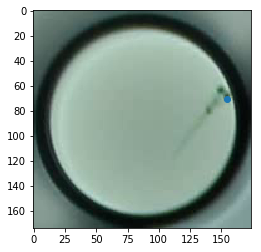

In [11]:
implot = plt.imshow(data[0,:,:,:])

# put a blue dot at (10, 20)
plt.scatter(154.86716, 70.144806)